 **Mariana Fernández Prieto CC 1001368196**

**Parcial 2**

A) Los siguientes datos fueron extraidos de un [perfil real de Instragram](https://www.instagram.com/paulacano24/):

https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/Followers.json

Interprete los datos como un problema de caida libre y a partir del ajuste (fit) a la correspondiente ecuación de movimiento, determine
1. La velocidad inicial de incremento de seguidores en `followers/hour`
1. La aceleración constante en `followers/hour**2`
1. El número máximo de seguidores que alcanzaría el perfil
1. La fecha en la que se alcanzaría dicho máximo

B) El período de  un pendulo de longitud $l$ oscilando a ángulos grandes  $\alpha$, está dado por
$$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha)^{\frac{1}{2}}}
$$
donde
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$
es el período del mismo péndulo a pequeñas amplitudes. Culquier intento de evaluación numérico de esa integral debería fallar. Sin embargo, si hacemos el cambio de variable
$$
\sin \frac{\theta}{2}=\sin \frac{\alpha}{2} \sin \phi
$$
obtenemos
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$
que corresponde a una integral bien comportada. 
1. Escriba un programa que use la anterio integral para calcular el cociente  $T/T_0$ para ángulos enteros (en grados) $0^\circ \le\alpha \le 90^\circ$.  
1. Genere un DataFrame de pandas que contenga como columnas: la amplitud en grados, la amplitud en radianes, y el cociente $T/T_0$, 
1. Haga un gráfico de $T/T_0$ como función de $\alpha$ (en grados). 
1. Explain the result when $\alpha = 0.$ 

# **A) Librerías**

In [90]:
import pandas as pd
import numpy as np
import datetime as dt

**Lectura de los datos**

In [19]:
#Se leen datos del perfil real de instagram
df = pd.read_json("https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/Followers.json")
df

,followers,date_time,hours
0,42696,2021-08-04 22:06:53.668,0.000000
1,42706,2021-08-04 23:06:56.517,1.000791
2,42716,2021-08-05 00:06:59.505,2.001621
3,42734,2021-08-05 01:07:02.174,3.002363
4,42749,2021-08-05 02:07:04.854,4.003107
...,...,...,...
615,47452,2021-09-02 12:29:21.834,686.374491
616,47486,2021-09-02 19:59:32.801,693.877537
617,47491,2021-09-02 20:59:50.542,694.882465
618,47493,2021-09-02 21:59:59.345,695.884910


**Asignación e interpolación y gráfico**

In [66]:
#Se asignan los valores de followers y hours a X y Y
X= df['hours']
Y = df['followers']

#Interpolación para obtener polinomio de grado 2
Coeff = np.polyfit(X,Y,2)
pol_1 = np.poly1d(Coeff)

print(pol_1)

           2
-0.002438 x + 8.552 x + 4.276e+04


No handles with labels found to put in legend.


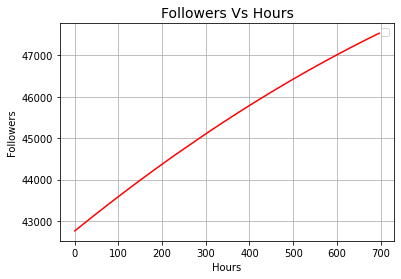

In [88]:
#Gráfico de interpolación
plt.plot(X,pol_1(X), 'red')
plt.title('Followers Vs Hours',size=14)
plt.ylabel('Followers')
plt.xlabel('Hours')
plt.grid()
plt.legend()
plt.show()

**Código para definir derivate**

In [53]:
from scipy import misc
# Código para definir derivate
def derivate(func,x0,**kwargs):
    '''
    Vectorized replacement of scipy.misc derivative:
        from scipy.misc import derivative
    For usage check the derivative help, e.g, in jupyter: 
        from scipy.misc import derivative
        derivative?
    '''
    try:
        #x0: can be an array or a list  
        nn=np.asarray(x0).shape[0] # force error if float is used 
        fp=np.vectorize(misc.derivative)
    except IndexError:
        fp=misc.derivative
        
    return fp(func,x0,**kwargs)

**1. La velocidad inicial de incremento de seguidores en followers/hour**

In [95]:
#Para hallar la velocidad derivamos en el punto inicial
Vel0= derivate(pol_1, x[0])
print("La velocidad inicial de incremento de seguidores en horas es de",Vel0, "followers/hour")

La velocidad inicial de incremento de seguidores en horas es de 8.552137792663416 followers/hour


**2.La aceleración constante en followers/hour^2**

In [96]:
Acel = derivate(pol_1, X_[0], n=2, order=3)
print("La aceleración constante es de", Acel/2,"followers/hour**2")


La aceleración constante es de -0.0024376271903747693 followers/hour**2


**3. El número máximo de seguidores que alcanzaría el perfil**

In [76]:
S = optimize.fmin_powell(-pol_1,500)
Máx=int(abs(pol_1(S))) #Valor máximo
print("El número máximo de seguidores que alcanzará el perfil es de", Máx)

Optimization terminated successfully.
         Current function value: -50262.136729
         Iterations: 2
         Function evaluations: 67
El número máximo de seguidores que alcanzará el perfil es de 50262


**4. La fecha en la que se alcanzaría dicho máximo**

In [102]:
h = float(S)
fecha= df['date_time'][0]+dt.timedelta(hours= h)
print("la fecha del máximo sería en: {}".format(fecha))

la fecha del máximo sería en: 2021-10-17 00:18:28.967354


Por tanto, la fecha en la que el usuario alcanzaría el máximo de seguidores según lo planteado sería el 17 de octubre de 2021 a las 6:18 pm

# **B) Librerías**

In [104]:
#Importando librerías
import numpy as np
import pandas as pd
from scipy import integrate
import scipy.optimize as optimize
import matplotlib.pylab as plt

**1. Programa que usa la integral para calcular el cociente T/T0 para ángulos enteros $0^\circ \le\alpha \le 90^\circ$.**



In [5]:
Integral = lambda α: integrate.quad(lambda ϕ:1/np.sqrt(1-np.sin(α/2)**2*np.sin(ϕ)**2),0,np.pi/2)[0]
def Itg(x):
    try:
        nn=np.array(x).shape[0]
        f=np.vectorize(Integral)
    except IndexError:
        f=Integral
    return f(x)*2/np.pi
m = np.linspace(0,np.pi/2,100)
Itg (m)

array([1.        , 1.00001573, 1.00006294, 1.00014163, 1.00025181,
       1.0003935 , 1.00056673, 1.00077153, 1.00100793, 1.00127597,
       1.00157571, 1.00190719, 1.00227047, 1.00266561, 1.00309268,
       1.00355177, 1.00404293, 1.00456628, 1.00512189, 1.00570986,
       1.0063303 , 1.00698332, 1.00766903, 1.00838755, 1.00913901,
       1.00992355, 1.01074131, 1.01159243, 1.01247707, 1.01339538,
       1.01434753, 1.0153337 , 1.01635406, 1.0174088 , 1.01849811,
       1.0196222 , 1.02078127, 1.02197553, 1.02320522, 1.02447055,
       1.02577177, 1.02710911, 1.02848285, 1.02989323, 1.03134052,
       1.03282501, 1.03434697, 1.03590671, 1.03750453, 1.03914074,
       1.04081567, 1.04252964, 1.04428299, 1.04607609, 1.04790929,
       1.04978296, 1.05169749, 1.05365326, 1.05565069, 1.05769018,
       1.05977217, 1.0618971 , 1.06406541, 1.06627758, 1.06853407,
       1.07083538, 1.07318201, 1.07557448, 1.07801332, 1.08049907,
       1.08303231, 1.0856136 , 1.08824354, 1.09092274, 1.09365

**2. Dataframe con amplitud en grados, amplitud en radianes y el cociente T/T0**

In [6]:
df = pd.DataFrame({'α [rad]':x_,'α [°]':x_*180/np.pi,'T/T0':Itg(m)})
df

,α [rad],α [°],T/T0
0,0.000000,0.000000,1.000000
1,0.015867,0.909091,1.000016
2,0.031733,1.818182,1.000063
3,0.047600,2.727273,1.000142
4,0.063467,3.636364,1.000252
...,...,...,...
95,1.507330,86.363636,1.163806
96,1.523196,87.272727,1.167832
97,1.539063,88.181818,1.171930
98,1.554930,89.090909,1.176099


**3. Gráfico de T/T0 como función de α (en grados)**

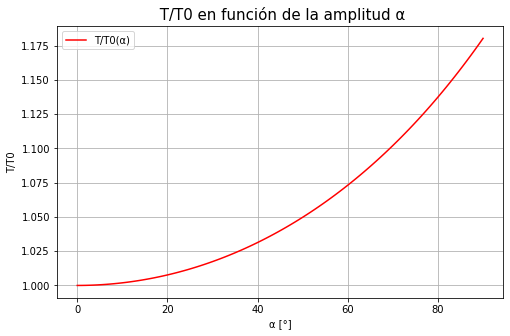

In [14]:
# Datos para graficar la función
plt.figure(figsize = (8,5))
plt.plot(df['α [°]'],df['T/T0'],'red',label = 'T/T0(α)')
plt.title(' T/T0 en función de la amplitud α',size=15)
plt.ylabel('T/T0')
plt.xlabel('α [°]')
plt.grid()
plt.legend()
plt.show()

**4. Explicación del resultado cuando α =0**

Cuando α se aproxima a 0 la amplitud se hace cada vez más pequeña por lo que el período se aproxima al período del péndulo a amplitudes pequeñas, es decir:

Cuando $$α\longrightarrow0$$
$$T\longrightarrow T_0$$
De modo que$$
\frac{T}{T_0} = 1
$$